# Forecasting of Stocks using ARIMA:RELIANCE

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import statsmodels

Importing data

In [2]:
df=yf.download('TCS.NS',start='2021-01-01',end='2023-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,2880.000000,2940.000000,2879.000000,2928.250000,2800.458252,2681440
2021-01-04,2950.000000,3050.750000,2940.949951,3039.449951,2906.805420,5113293
2021-01-05,3039.600098,3114.250000,3039.600098,3093.000000,2958.018311,5801309
2021-01-06,3100.000000,3113.500000,3037.199951,3051.500000,2918.329590,3726716
2021-01-07,3075.000000,3080.850098,3000.250000,3032.800049,2900.446045,3717827
...,...,...,...,...,...,...
2022-12-26,3228.350098,3272.000000,3225.050049,3252.899902,3188.315186,870157
2022-12-27,3269.199951,3273.800049,3231.500000,3259.500000,3194.784424,835883
2022-12-28,3249.800049,3266.100098,3226.000000,3257.100098,3192.432129,910795


In [3]:
df = df["Close"]['2021-01-01':'2023-01-01']
df

Date
2021-01-01    2928.250000
2021-01-04    3039.449951
2021-01-05    3093.000000
2021-01-06    3051.500000
2021-01-07    3032.800049
                 ...     
2022-12-26    3252.899902
2022-12-27    3259.500000
2022-12-28    3257.100098
2022-12-29    3268.750000
2022-12-30    3256.699951
Name: Close, Length: 496, dtype: float64

In [4]:
#Descriptive Stat
df.describe().rename('Descriptive Statistics')

count     496.000000
mean     3375.567234
std       258.170395
min      2894.300049
25%      3167.274963
50%      3314.824951
75%      3582.275085
max      4019.149902
Name: Descriptive Statistics, dtype: float64

Text(0.5, 1.0, 'TCS Stock Closing Prices')

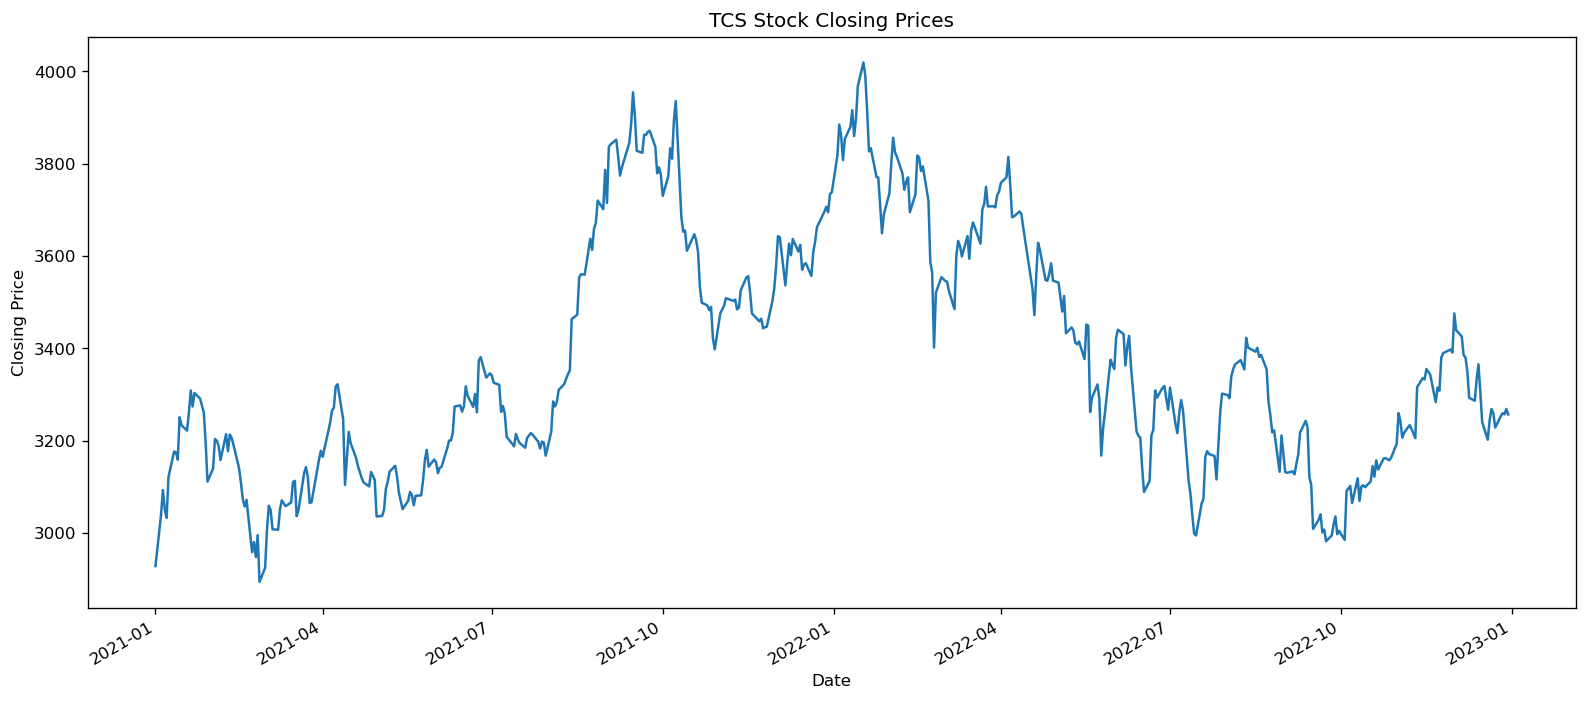

In [5]:
#Plotting imported data
plt.figure(figsize=(16,7))
plt.grid(True)
df.plot()
plt.ylabel('Closing Price')
plt.title('TCS Stock Closing Prices')

Text(0, 0.5, 'Probability')

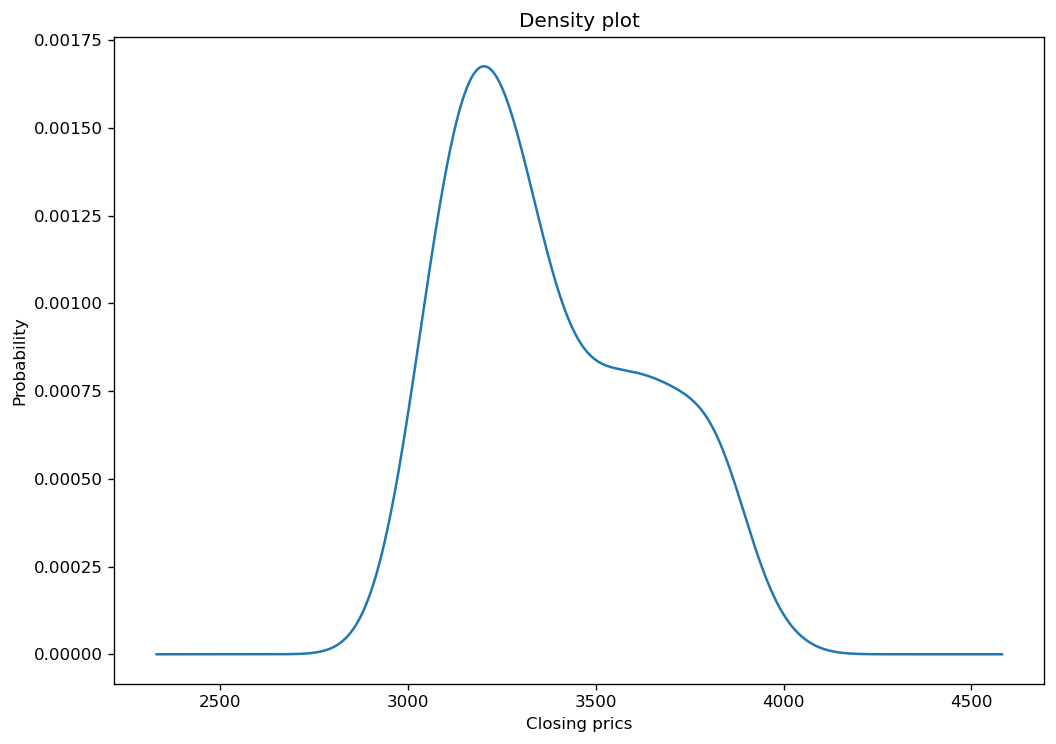

In [6]:
#Distribution of the dataset
df.plot(kind='kde')
plt.title('Density plot')
plt.xlabel('Closing prics')
plt.ylabel('Probability')

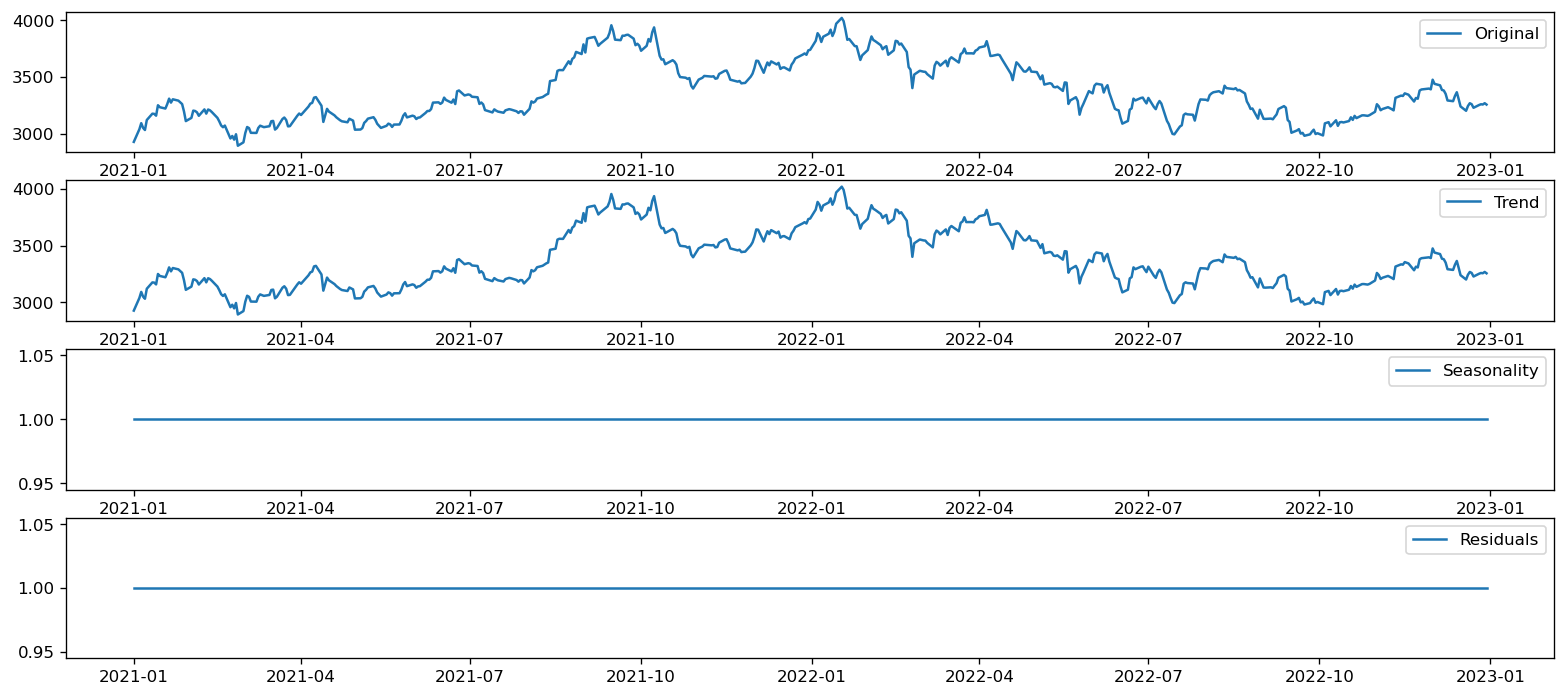

In [7]:
#Decomposition of time series into its components:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,period=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()

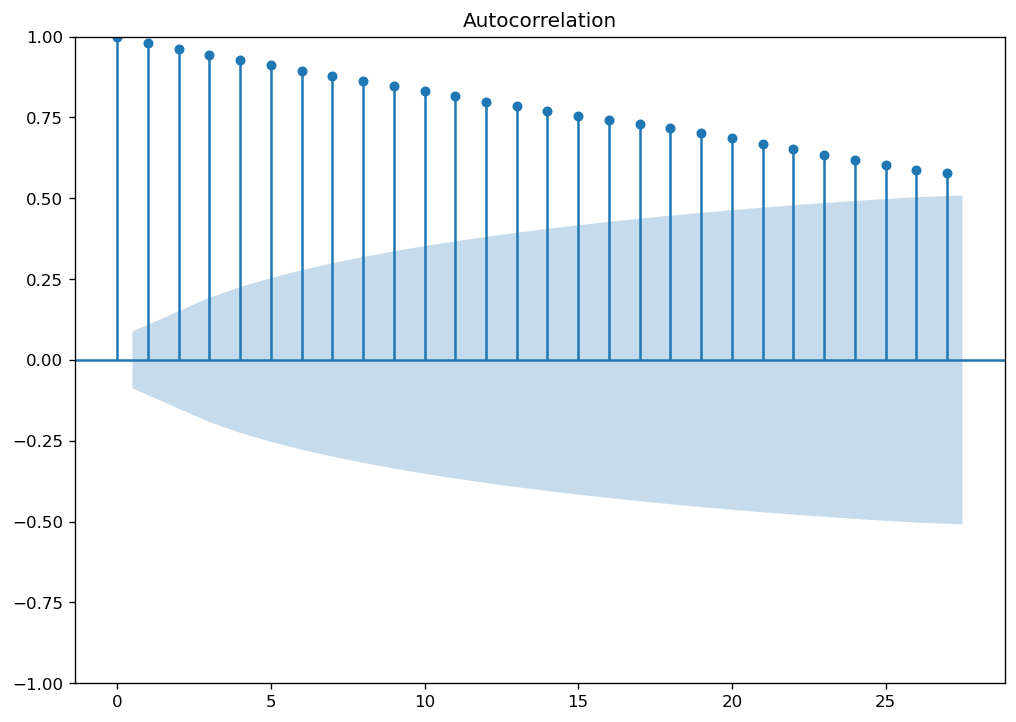

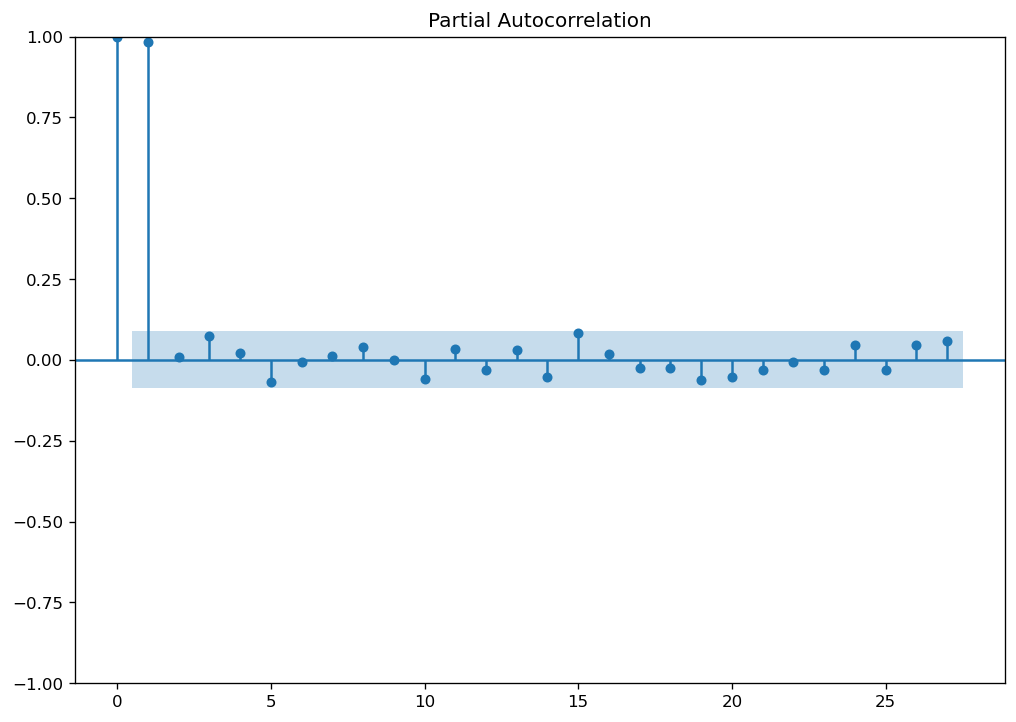

In [8]:
#Plotting ACF and PACF plots
import warnings 
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_original=plot_acf(df)
pacf_original=plot_pacf(df)

From the above plot of closing prices it seems that time series is not stationary and also there is only trend component present. #ADFuller test for checking stationarity of data

In [9]:
#Checking stationarity: ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.395262
p-value: 0.143078


As p-value not very close to zero, null hypothesis about non-stationarity is accepted.
#Transform to statinarity:Differencing

Text(0.5, 1.0, 'First order differenced time series')

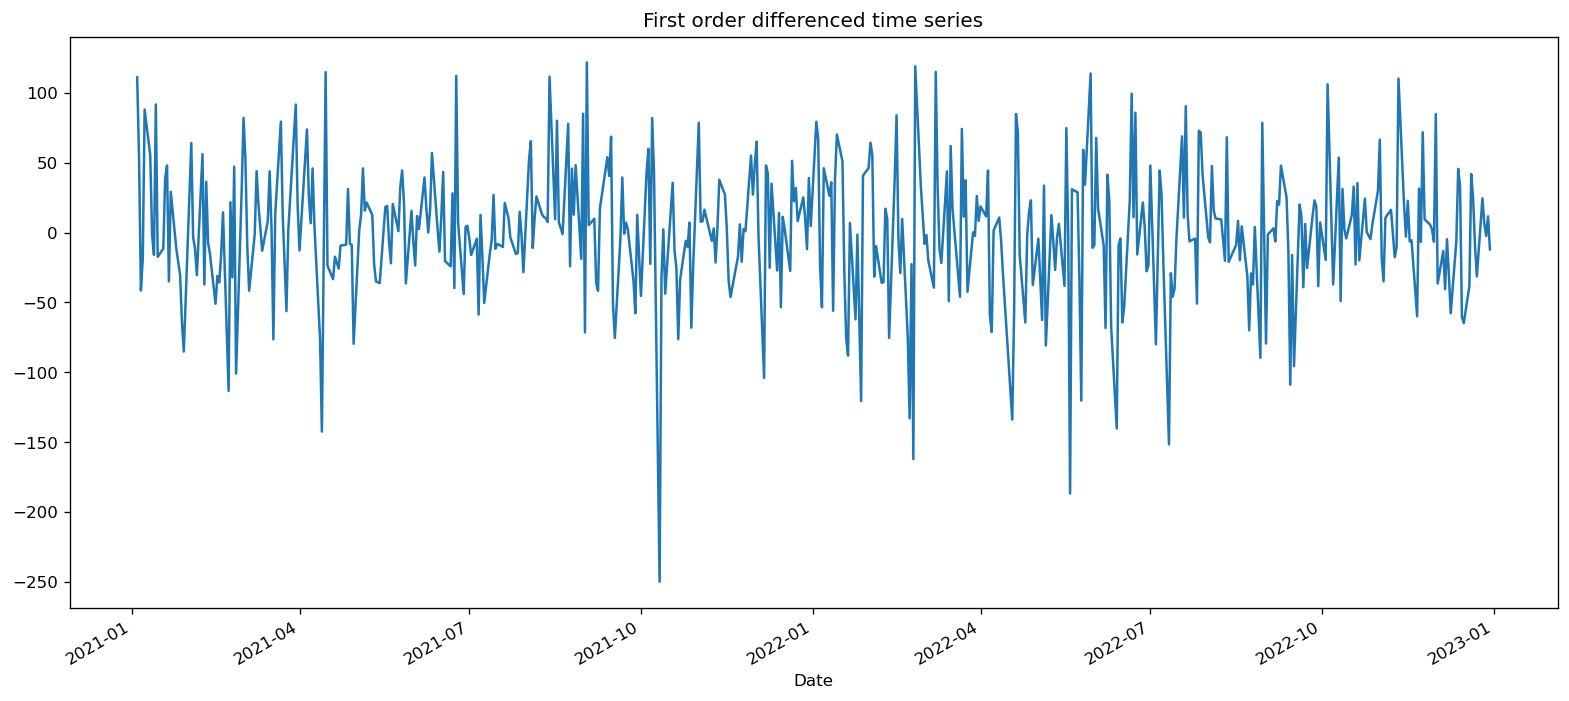

In [10]:
#Differncing
df_diff=df.diff().dropna()
plt.figure(figsize=(16,7))
df_diff.plot()
plt.title('First order differenced time series')

As we from above plot, it is stationary at some extent than the original data.
#Again checking for stationarity:

In [11]:
#Statinarity checking of diffrenced data
result = adfuller(df_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -21.784783
p-value: 0.000000


As p-value<0.05, null hypothesis about non-stationarity is rejected. First differencing makes series stationary that is d=1.
#ACF and PACF plots for determining p and q

In [12]:
#Determining d directly
from pmdarima.arima.utils import ndiffs
ndiffs(df,test="adf")

1

#ACF and PACF plots for determining p and q

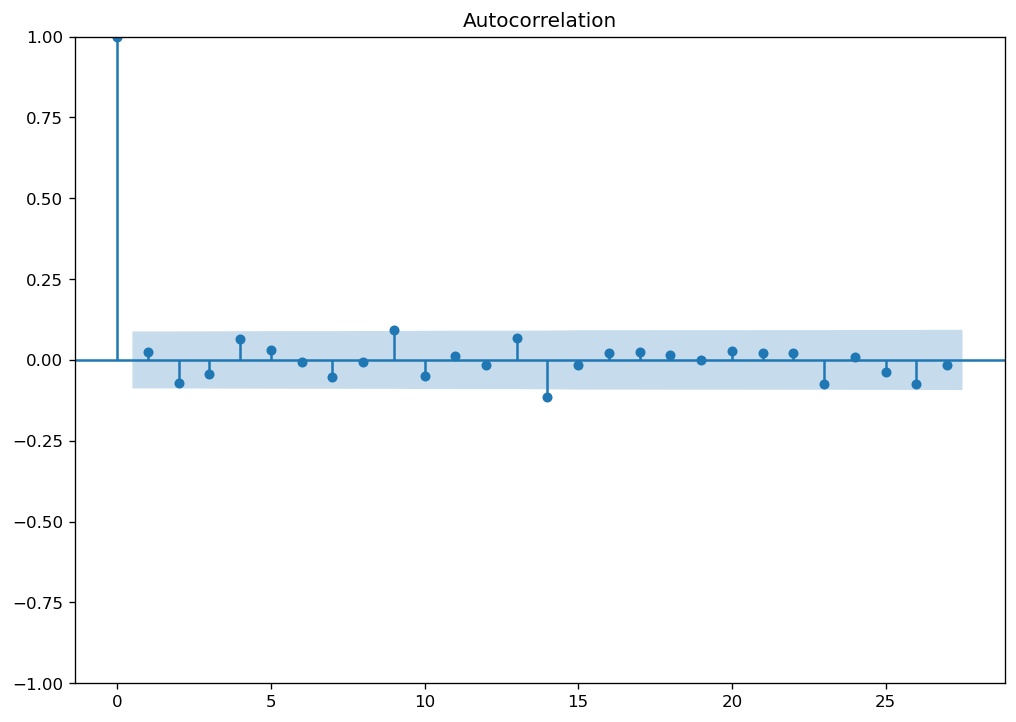

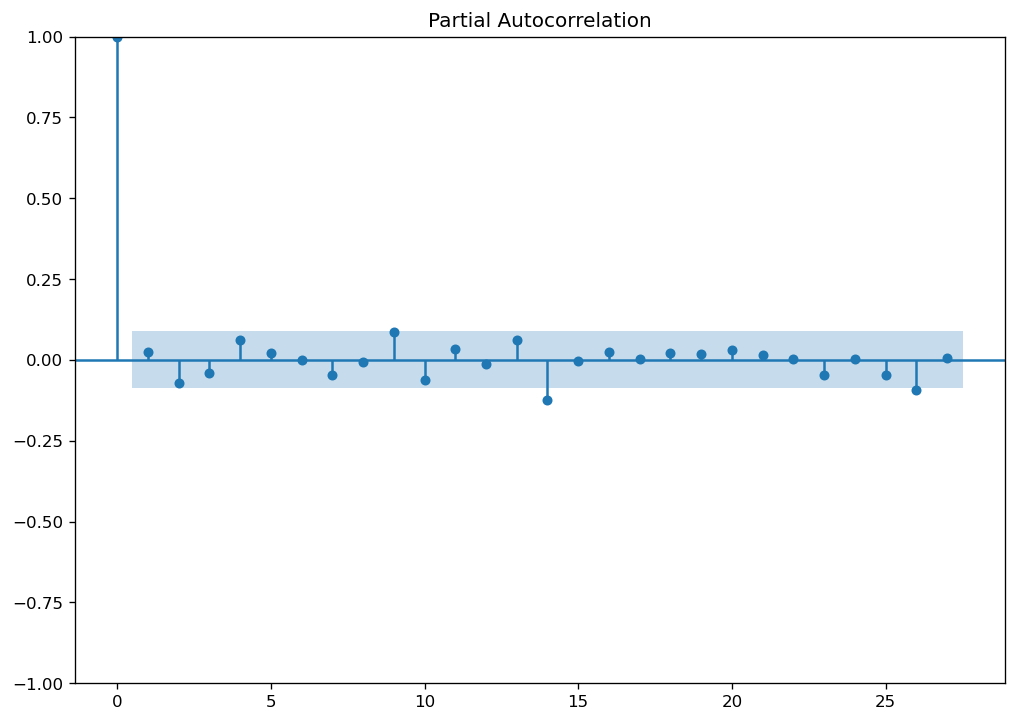

In [12]:
#Plotting ACF and PACF on differenced data
import warnings 
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_diff=plot_acf(df_diff)
pacf_diff=plot_pacf(df_diff)

From autocorrelation plot we have 9th point above the reference for the first time that is q=9.
From partial-autocorrelation plot we have 9th point above the reference for the first time that is p=9.

#Determing p,d,q automatically

In [14]:
import pmdarima as pm
auto_arima=pm.auto_arima(df,stepwise=False,seasonal=False)
auto_arima

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

Let's try fitting arima with p=9, d=1, q=9
#Splitting data as training and testing

In [15]:
#ARIMA bulding on whole data
from statsmodels.tsa.arima.model import ARIMA

#  ARIMA Model
model = ARIMA(df, order=(9,1,9))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  496
Model:                 ARIMA(9, 1, 9)   Log Likelihood               -2597.572
Date:                Sun, 28 May 2023   AIC                           5233.144
Time:                        10:55:57   BIC                           5313.031
Sample:                             0   HQIC                          5264.505
                                - 496                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4417      0.777     -0.568      0.570      -1.965       1.082
ar.L2          0.2409      0.213      1.132      0.258      -0.176       0.658
ar.L3         -0.2696      0.353     -0.764      0.4

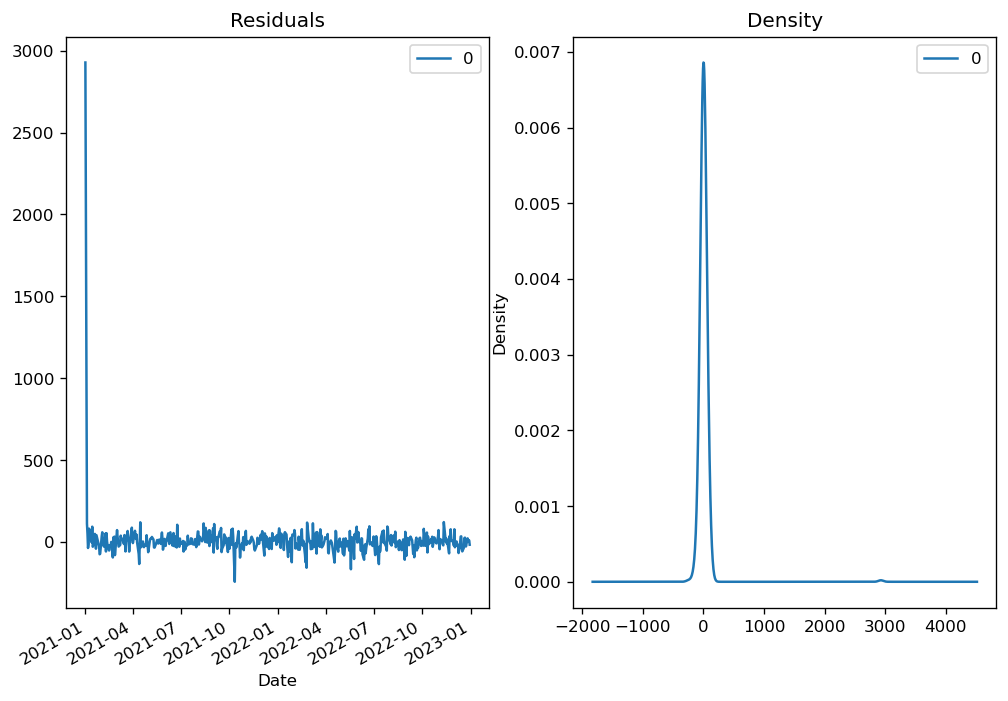

In [16]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

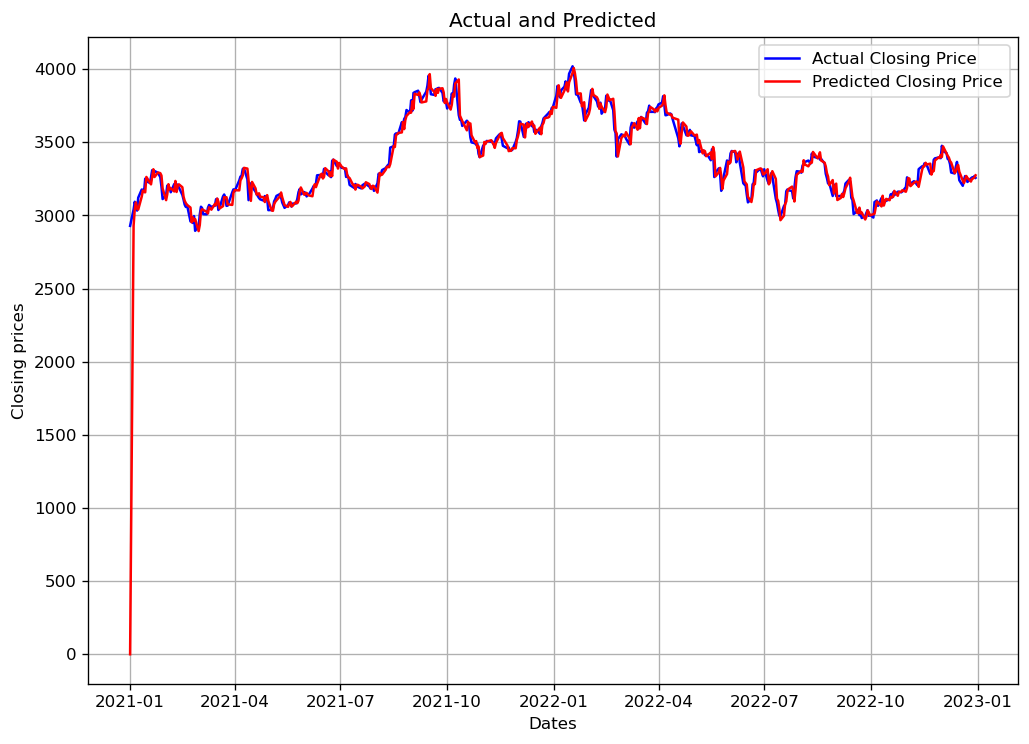

In [16]:
#Plotting actual against predicted
actual = df
predicted = model_fit.predict()
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(actual,color='blue',label='Actual Closing Price')
plt.plot(predicted,color='red',label='Predicted Closing Price')
plt.title('Actual and Predicted')
plt.legend()

In [17]:
#Splitting training and testing data
tr=int(len(df)*0.8)
train=df[0:tr]
test=df[tr:]
print(train.shape,test.shape)

(396,) (100,)


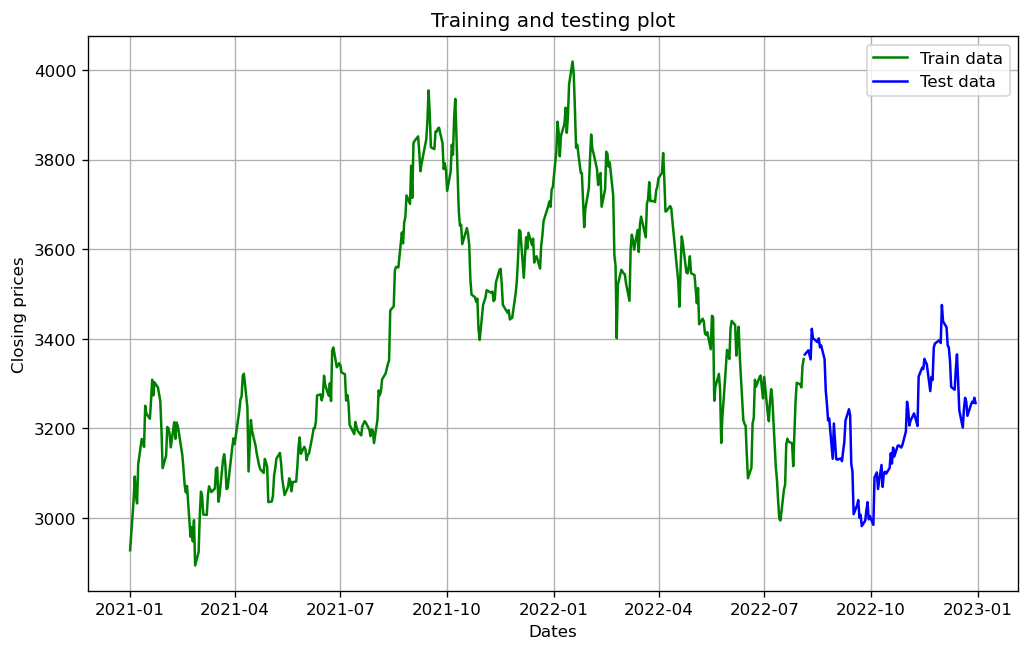

In [18]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(train,'green',label='Train data')
plt.plot(test,'blue',label='Test data')
plt.title('Training and testing plot')
plt.legend()

In [19]:
#ARIMA bulding on training data
import warnings 
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(9,1,9))
model_train=model.fit()
print(model_train.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  396
Model:                 ARIMA(9, 1, 9)   Log Likelihood               -2085.287
Date:                Sun, 28 May 2023   AIC                           4208.573
Time:                        10:56:27   BIC                           4284.172
Sample:                             0   HQIC                          4238.526
                                - 396                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2624      0.229     -1.144      0.253      -0.712       0.187
ar.L2          0.0084      0.181      0.046      0.963      -0.346       0.363
ar.L3         -0.0083      0.173     -0.048      0.9

In [20]:
#Prediction based on test data
start=len(train)
end=len(train)+len(test)-1
test_pred=model_train.predict(start=start,end=end).rename('Prediction on test data')
test_pred.index=df.index[start:end+1]
print(test_pred)

Date
2022-08-05    3341.276037
2022-08-08    3308.907096
2022-08-10    3321.071259
2022-08-11    3343.613193
2022-08-12    3358.173654
                 ...     
2022-12-26    3367.197313
2022-12-27    3372.095758
2022-12-28    3353.701030
2022-12-29    3352.413887
2022-12-30    3354.938276
Name: Prediction on test data, Length: 100, dtype: float64


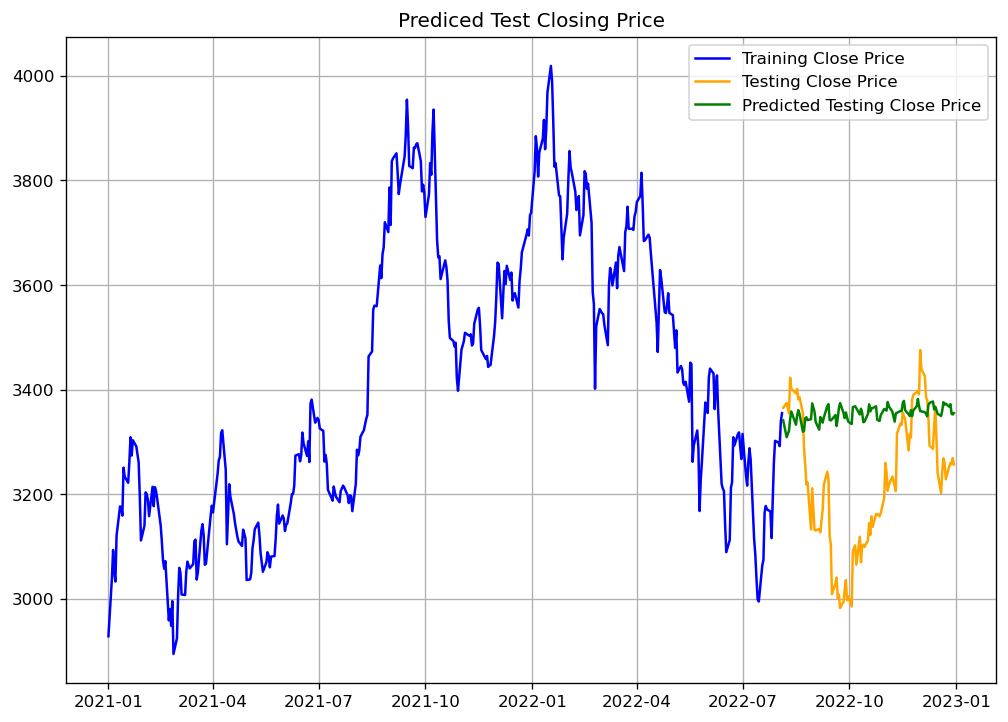

In [21]:
#Plotting actual against predicted
plt.grid(True)
plt.plot(train,color='blue',label='Training Close Price')
plt.plot(test, color = 'orange', label='Testing Close Price')
plt.plot(test_pred, color = 'green', label='Predicted Testing Close Price')
plt.title('Prediced Test Closing Price')
plt.legend()

In [22]:
#Forecasting: Predicting future data
index_future_dates=pd.date_range(start='2023-01-02',end='2023-04-11')
#print(index_future_dates)
forecast=model_train.predict(start=len(df),end=len(df)+99,type='levels').rename('ARIMA Forecast')
forecast.index=index_future_dates
print(forecast)

2023-01-02    3369.816250
2023-01-03    3371.118198
2023-01-04    3370.383387
2023-01-05    3376.557538
2023-01-06    3372.273768
                 ...     
2023-04-07    3363.880607
2023-04-08    3365.351048
2023-04-09    3376.316866
2023-04-10    3374.559293
2023-04-11    3380.883155
Freq: D, Name: ARIMA Forecast, Length: 100, dtype: float64


Text(0.5, 1.0, 'Forecasting using ARIMA')

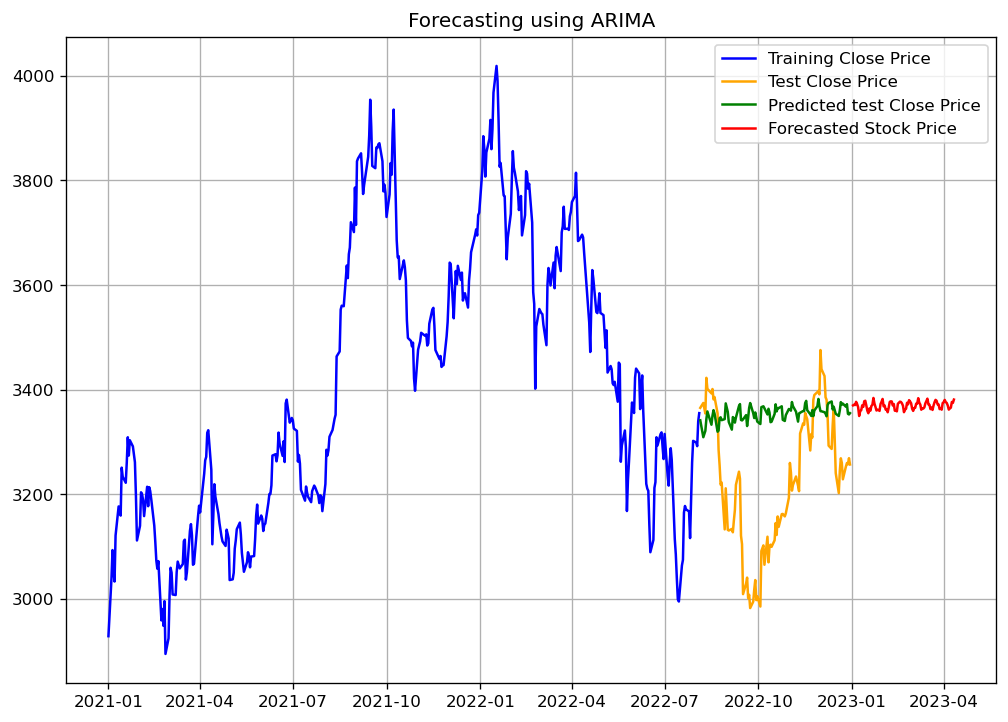

In [23]:
plt.grid(True)
plt.plot(train,color='blue',label='Training Close Price')
plt.plot(test, color = 'orange', label='Test Close Price')
plt.plot(test_pred, color = 'green', label='Predicted test Close Price')
plt.plot(forecast, color = 'red',label='Forecasted Stock Price')
plt.legend()
plt.title('Forecasting using ARIMA')

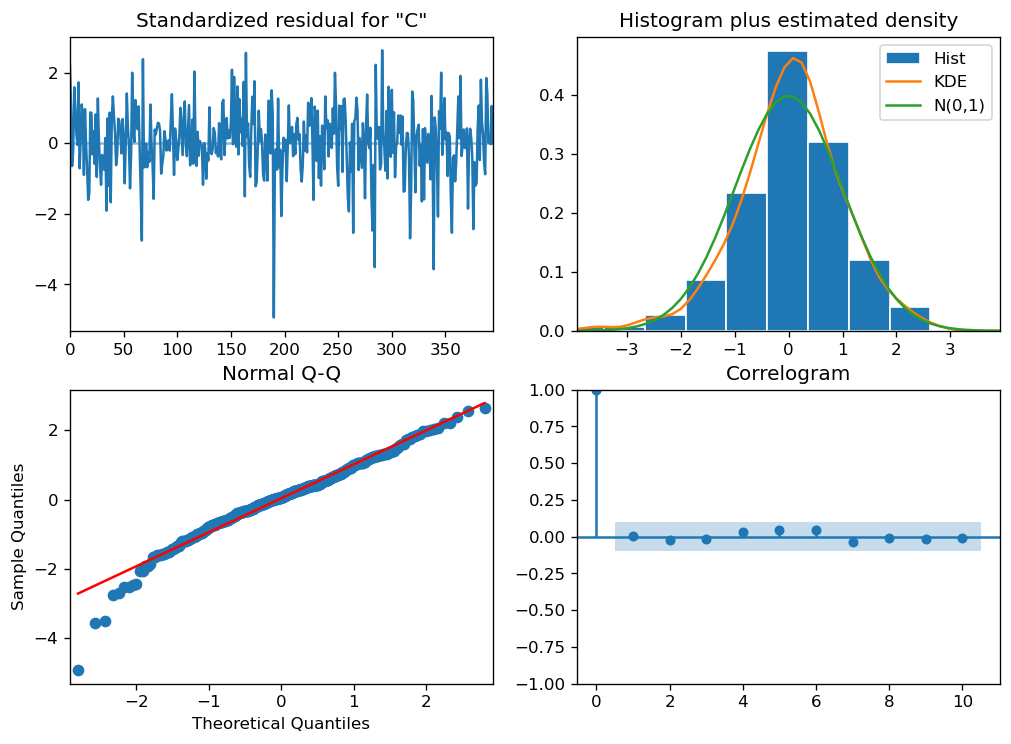

In [24]:
#Diagnostic check
model_train.plot_diagnostics(figsize=(10,7))
plt.show()

In [25]:
#Accuracy: MAPE
TEST=test.reset_index(drop=True)
PRED=forecast.reset_index(drop=True) 
mape = np.mean(np.abs(PRED - TEST)/np.abs(TEST))
mape

0.049517151365407935

In [26]:
from math import sqrt
rmse=sqrt(mean_squared_error(test,test_pred))
print(rmse)

180.44403765479996


In [18]:
df.mean(),np.sqrt(df.var())

(3375.5672341623613, 258.17039486777975)